In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel as krnl
from deflected_subgradient import solveDeflected
from SVR import SVR
from svr_grid_search import Gridsearch
import matplotlib.pyplot as plt
import random
import copy
from sklearn.metrics import r2_score

In [27]:
def create_kernel(x, kernel, coef, degree, gamma):
    # interface function to get the desired kernel output
    if kernel == 'linear':
        return krnl.linear(x, x)
    elif kernel == 'rbf':
        return krnl.rbf(x, x, gamma)
    elif kernel == 'poly':
        print('hello')
        return krnl.poly(x, x, gamma, degree, coef)
    elif kernel == 'sigmoid':
        return krnl.sigmoid(x, x, gamma, coef)

# method to get the fstar of a sklearn svr model
def sklearn_fstar(x, y, sklearn_model):
    # create a correct betas array, filling with zeros where needed
    betas = np.zeros(sklearn_model.shape_fit_[0])
    dual_coef_iter = 0
    for i in range(sklearn_model.shape_fit_[0]):
        if i in sklearn_model.support_:
            betas[i] = sklearn_model.dual_coef_[0][dual_coef_iter]
            dual_coef_iter += 1
        else:
            betas[i] = 0.0
    betas = np.vstack(betas)
    
    # create kernel
    K = create_kernel(x, sklearn_model.kernel, sklearn_model.coef0, sklearn_model.degree, sklearn_model.gamma)[0]
    
    # calculate as in below formula
    fstar = (0.5 * np.dot(np.dot(np.transpose(betas), K), betas) 
            + sklearn_model.epsilon * np.sum(np.abs(betas))
            - np.transpose(y).dot(betas))
    return fstar
    

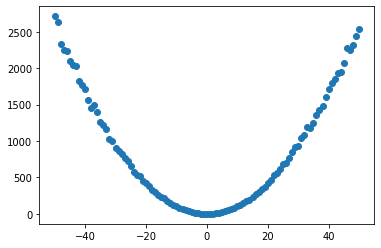

In [3]:
x = np.vstack(np.arange(-50,51,1))
degree = 2
noising_factor = 0.1
y = [xi**degree for xi in x]
y = [ yi + noising_factor * (np.random.rand()*yi) for yi in y]
y=np.array(y, dtype=np.float64)
plt.scatter(x,y)
plt.show()

In [4]:
tr_x, val_x = x[:len(x)-len(x)//5], x[len(x)-len(x)//5:]
tr_y, val_y = y[:len(y)-len(y)//5], y[len(y)-len(y)//5:]
gs = Gridsearch()
gs.set_parameters(
    kernel=["poly", "poly"],
    kparam=[{"degree":2, "gamma":1},{"degree":3, "gamma":1}],
    box=[0.1,1,10],
    eps=[0.05,0.1,0.5],
    optiargs=[{'eps':1e-2, 'maxiter':1e3}, {'eps':5e-3, 'maxiter':1e3}, {'eps':5e-4, 'maxiter':1e3}]
)
best_coarse_model = gs.run(
    tr_x, tr_y, val_x, val_y
)

print("BEST COARSE GRID SEARCH MODEL:",best_coarse_model)

svr = best_coarse_model
kernel, kparam, optiargs, eps, box  = gs.get_model_perturbations(best_coarse_model, 10, 6)
print(kernel, kparam, optiargs)
gs.set_parameters(
    eps=eps,
    box=box,
    kernel=kernel,
    kparam=kparam,
    optiargs=optiargs
)
best_fine_model = gs.run(
    x, y, val_x, val_y
)
print("BEST FINE GRID SEARCH MODEL:", best_fine_model)

svr = best_fine_model
pred = [float(svr.predict(x[i])) for i in range(x.shape[0])]
print("T LOSS:", svr.eps_ins_loss(y, pred))

pred = [float(svr.predict(val_x[i])) for i in range(val_x.shape[0])]
print("V LOSS:", svr.eps_ins_loss(val_y, pred))

(GS - SVR) - Creating models
(GS - SVR) - Fitting 54 models
(GS - SVR) - model 1/54
Fit time: 1.8367209434509277, #SV: 80
	(GS - SVR) - Time taken: 1.8377211093902588 - Remaining: 97.39921879768372
(GS - SVR) - model 2/54
Fit time: 1.888359546661377, #SV: 81
	(GS - SVR) - Time taken: 3.7260806560516357 - Remaining: 96.87809705734253
(GS - SVR) - model 3/54
Fit time: 1.9020185470581055, #SV: 66
	(GS - SVR) - Time taken: 5.628099203109741 - Remaining: 95.6776864528656
(GS - SVR) - model 4/54
Fit time: 1.7893619537353516, #SV: 80
	(GS - SVR) - Time taken: 7.417461156845093 - Remaining: 92.71826446056366
(GS - SVR) - model 5/54
Fit time: 1.7820000648498535, #SV: 81
	(GS - SVR) - Time taken: 9.199461221694946 - Remaining: 90.15471997261048
(GS - SVR) - model 6/54
Fit time: 1.9000403881072998, #SV: 66
	(GS - SVR) - Time taken: 11.100467681884766 - Remaining: 88.80374145507812
(GS - SVR) - model 7/54
Fit time: 1.7809937000274658, #SV: 80
	(GS - SVR) - Time taken: 12.88248872756958 - Remaining

(GS - SVR) - Fitting 60 models
(GS - SVR) - model 1/60
Fit time: 3.4630024433135986, #SV: 101
	(GS - SVR) - Time taken: 3.4640023708343506 - Remaining: 204.37613987922668
(GS - SVR) - model 2/60
Fit time: 3.212961435317993, #SV: 101
	(GS - SVR) - Time taken: 6.676963806152344 - Remaining: 193.63195037841797
(GS - SVR) - model 3/60
Fit time: 3.2761898040771484, #SV: 101
	(GS - SVR) - Time taken: 9.953153610229492 - Remaining: 189.10991859436035
(GS - SVR) - model 4/60
Fit time: 3.558993101119995, #SV: 101
	(GS - SVR) - Time taken: 13.512146711349487 - Remaining: 189.17005395889282
(GS - SVR) - model 5/60
Fit time: 3.2539992332458496, #SV: 101
	(GS - SVR) - Time taken: 16.76711082458496 - Remaining: 184.43821907043457
(GS - SVR) - model 6/60
Fit time: 3.2780396938323975, #SV: 101
	(GS - SVR) - Time taken: 20.0461483001709 - Remaining: 180.4153347015381
(GS - SVR) - model 7/60
Fit time: 3.378998041152954, #SV: 101
	(GS - SVR) - Time taken: 23.425146341323853 - Remaining: 177.3618222985949

Fit time: 3.520998954772949, #SV: 101
	(GS - SVR) - Time taken: 201.48628306388855 - Remaining: 0.0
(GS - SVR) - Evaluating models
(GS - SVR) - SVR: 0 - TR MEE 39.2122605847506 - VL MEE 38.91021305695129 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [47.48977164]\Optim_args: {'eps': 0.005, 'maxiter': 1000.0, 'vareps': 0.05}
Box: 10

(GS - SVR) - SVR: 1 - TR MEE 447.5607275365481 - VL MEE 552.4731225549406 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [584.02265178]\Optim_args: {'eps': 0.0285043221086169, 'maxiter': 1000.0, 'vareps': 0.05}
Box: 10

(GS - SVR) - SVR: 2 - TR MEE 114.66425766158346 - VL MEE 131.93579653607168 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [149.95255206]\Optim_args: {'eps': 0.025240962746826624, 'maxiter': 1000.0, 'vareps': 0.05}
Box: 10

(GS - SVR) - SVR: 3 - TR MEE 32.35692985521113 - VL MEE 54.99553329934461 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [-26.37618065]\Optim_args: {'eps': 0.004466

In [70]:
import time
start = time.time()
svr = SVR("poly", {"degree":degree, "gamma": 0.9676294752361521, 'coef': 0.24883806228259853}, box=10)
svr.fit(x, y, {'eps':  0.004466984720903306, 'maxiter': 1e3, 'vareps': 0.05}, optim_verbose=False)
print(f"elapsed time {time.time() - start}")

Fit time: 3.478999614715576, #SV: 100
elapsed time 3.5199975967407227


b: [38.24906939]
Gamma: 0.9676294752361521 - Box: 10
PREDICTION (INPUT = 12) [[180.69750111]]
LOSS: [205926.75367124]


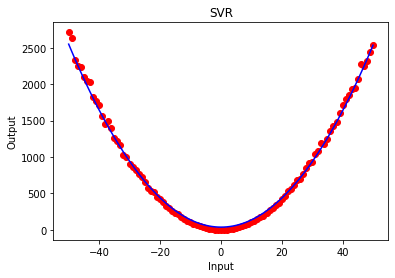

0.9967436837887009

In [71]:
to_predict = 12
pred = svr.predict(to_predict)
print(f"b: {svr.intercept}")
print(f"Gamma: {svr.gamma_value} - Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(y, pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()
r2_score(y, pred)

elapsed time 0.0030014514923095703
 b: [46.71193953]
Gamma: 0.9676294752361521 - Box: 10
PREDICTION (INPUT = 12) [189.17130928]


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


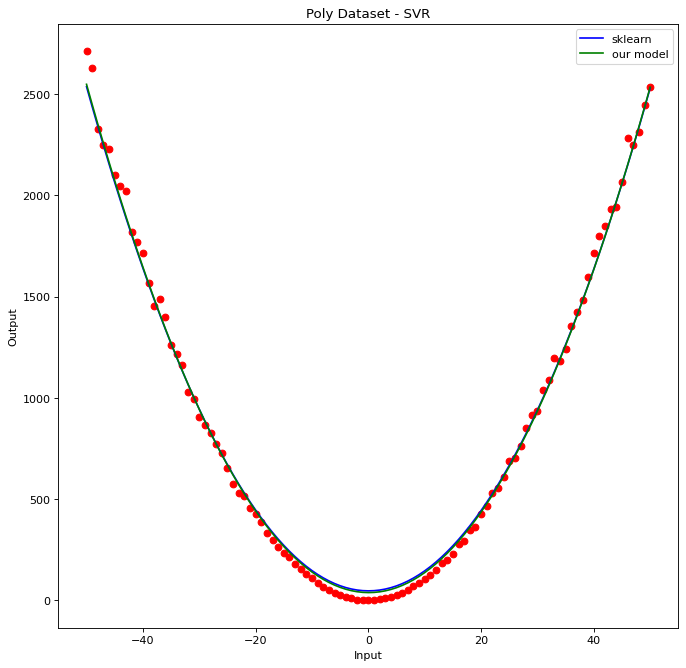

0.9961779491592276

In [72]:
import sklearn.svm as ss
import time
start = time.time()
regressor = ss.SVR(kernel = 'poly', C=10, epsilon=0.05, degree=degree, gamma=0.9676294752361521, max_iter=1e3, coef0=0.24883806228259853)

xs = x
ys = y
regressor.fit(xs, ys.ravel())
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(np.array([[to_predict]]))
print(f" b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
print(f'PREDICTION (INPUT = {to_predict})', y_pred)

sklearn_predict = regressor.predict(x)
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)
plt.scatter(x, y, color = 'red')
plt.plot(x, sklearn_predict, color = 'blue', label='sklearn')
plt.plot(x, pred, color = 'green', label='our model')
plt.title('Poly Dataset - SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
r2_score(y, sklearn_predict)

In [19]:
print("eps:",regressor.epsilon)
print("b:",regressor.intercept_)
params = regressor.get_params()
print("gamma:",params['gamma'])
print("C:",params['C'])
print("sv:",regressor.support_vectors_)
print("supp index:",regressor.support_)

eps: 0.05
b: [46.71193953]
gamma: 0.9676294752361521
C: 10
sv: [[-50.]
 [-49.]
 [-48.]
 [-46.]
 [-43.]
 [-42.]
 [-41.]
 [-40.]
 [-24.]
 [ -8.]
 [ -2.]
 [ -1.]
 [  0.]
 [  1.]
 [ 40.]
 [ 41.]
 [ 44.]
 [ 46.]
 [ 49.]
 [ 50.]]
supp index: [  0   1   2   4   7   8   9  10  26  42  48  49  50  51  90  91  94  96
  99 100]


In [21]:
regressor.epsilon

0.05

In [22]:
regressor.get_params()

{'C': 10,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 2,
 'epsilon': 0.05,
 'gamma': 1,
 'kernel': 'poly',
 'max_iter': 1000.0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
regressor.dual_coef_

array([[ 1.00000000e+01,  1.00000000e+01, -1.69247565e-01,
        -1.00000000e+01,  7.34295825e-01, -4.31274708e-01,
        -1.00000000e+01, -2.94029132e+00, -1.32766103e-03,
        -5.11755893e-01, -2.82888651e+00, -1.32104706e+00,
         9.15097412e-01,  3.74791971e+00,  2.94029132e+00,
         1.00000000e+01, -3.03021117e-01,  1.00000000e+01,
        -1.00000000e+01, -9.83075243e+00]])

In [73]:
sklearn_fstar(x, y, regressor), svr.history['fstar']

poly
hello


(array([[-4523.40797383]]), -3.6273295293357926)